In [1]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('fullData.csv')

In [6]:
df.columns

Index(['Unnamed: 0', 'id', 'location', 'lastLocation', 'gender', 'birthdate',
       'coordinates', 'test', 'points', 'country', 'countryNames'],
      dtype='object')

In [7]:
dfn = df[['gender','birthdate','countryNames']].copy(deep=True)

In [11]:
#dfn.groupby(['countryNames','gender','birthdate']).sum();

In [12]:
#dfn['birthdate'] = pd.to_datetime(dfn.birthdate).dt.strftime('%d/%m/%Y')

In [13]:
#dfn["birthdate"].fillna(0,inplace=True)
now = pd.Timestamp('now')
#dfn['birthdate'] =  pd.to_datetime(dfn.birthdate).dt.strftime('%d/%m/%Y')#pd.to_datetime(dfn['birthdate'], format='%d/%m/%y')    # 1


In [14]:
dfn['birthdate'] =  pd.to_datetime(dfn['birthdate'], format='%Y/%m/%d')    # 1

In [15]:
dfn['birthdate'] = dfn['birthdate'].where(dfn['birthdate'] < now, dfn['birthdate'] -  np.timedelta64(100, 'Y'))   # 2
dfn['age'] = (now - dfn['birthdate']).astype('<m8[Y]')    # 3

In [16]:
labels = ['10-20','20-30','30-40','40-50','50-above']
bins = [10,20,30,40,50,60]

In [17]:
dfn["binned_ages"] = pd.cut(dfn["age"], bins=bins, labels=labels)

In [18]:
dfn["binned_ages"].isnull().sum()

83783

In [19]:
dfn["binned_ages"].cat.add_categories('empty').fillna('empty',inplace=True )

In [16]:
import seaborn as sns

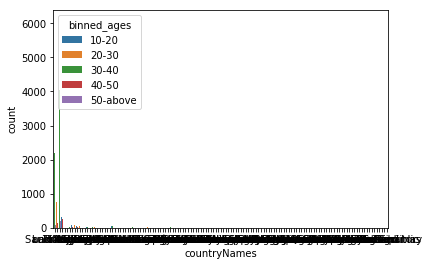

In [17]:
sns.countplot(x='countryNames', data=dfn, hue='binned_ages')

In [24]:
dfn.groupby(['countryNames','gender'])['binned_ages'].count()

countryNames            gender
Algeria                 0.0           2
                        1.0          12
Angola                  0.0           1
                        1.0           3
Argentina               1.0           2
Austria                 0.0           0
                        1.0           4
Azerbaijan              0.0          13
                        1.0         123
Bangladesh              0.0           1
                        1.0           9
Belarus                 1.0           6
Belgium                 0.0           1
                        1.0           7
Benin                   1.0           3
Bosnia and Herzegovina  1.0           2
Botswana                1.0           1
Brazil                  0.0           3
                        1.0           6
Bulgaria                0.0           1
                        1.0           6
Burkina Faso            1.0           1
Cameroon                0.0           1
                        1.0           3
Canada   

In [22]:
import pandas as pd
import plotly.express as px


In [43]:
grouped_df = dfn.groupby(by=["countryNames", "gender"], as_index=False).agg(
    {"binned_ages": "count"}
)

In [31]:
grouped_df = dfn.groupby(by=["countryNames", "gender","binned_ages"], as_index=False).agg(
    {"age": "size"}
)

In [33]:
#dfn[dfn["countryNames"]=="Algeria",dfn["gender"]=="1"]

In [34]:
grouped_df.gender = grouped_df.gender.map({0: "female", 1: "male",})


In [35]:
grouped_df.to_csv("displaydata.csv")

In [2]:
## Version 2

In [32]:
dfg = pd.read_csv("displaydata.csv")

In [33]:
dfg.columns

Index(['Unnamed: 0', 'countryNames', 'gender', 'binned_ages', 'age'], dtype='object')

In [34]:
dfg1 = dfg[["countryNames","gender","age"]].copy(deep=True)

In [35]:
dfg1["gender"].value_counts()

male      253
female    118
Name: gender, dtype: int64

In [30]:
#dfg1.groupby(by=["countryNames", "gender"], as_index=False).agg(
#    {"count": "count"}
#)

In [59]:
dfg1.dtypes

countryNames    object
gender          object
age              int64
dtype: object

In [44]:
real = pd.pivot_table(dfg1, index='countryNames', columns='gender',values="age",fill_value = 0,aggfunc='sum')

In [49]:
real.reset_index(inplace=True)

In [67]:
real["total"] = real["female"] + real['male']

In [57]:
dfg2.dtypes

countryNames    object
binned_ages     object
age              int64
dtype: object

In [53]:
dfg2 = dfg[["countryNames","binned_ages","age"]].copy(deep=True)

In [58]:
print (dfg2.columns.tolist())

['countryNames', 'binned_ages', 'age']


In [60]:
real2 = pd.pivot_table(dfg2, index='countryNames', columns='binned_ages',values="age",fill_value = 0,aggfunc='sum')

In [62]:
real2.reset_index(inplace=True)

In [63]:
#### Join the data tables

In [68]:
realfinal = real.merge(real2, on='countryNames', how='inner')


In [70]:
realfinal.to_csv("updatedData.csv")

In [ ]:
pdf.save

In [71]:
realfinal.head()

,countryNames,female,male,total,10-20,20-30,30-40,40-50,50-above
0,Algeria,2,12,14,0,7,7,0,0
1,Angola,1,3,4,0,1,3,0,0
2,Argentina,0,2,2,0,1,0,1,0
3,Austria,0,4,4,0,1,3,0,0
4,Azerbaijan,13,123,136,33,63,35,4,1
